In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def visualize_min(df):
    min_cols = [col for col in df.columns if col.endswith('_min')]
    df_min_melted = df[min_cols].melt(var_name='Variable', value_name='Value')
    plt.figure(figsize=(15, 3))
    # Violin plot for _min columns
    sns.violinplot(x='Variable', y='Value', data=df_min_melted)
    plt.title('Violin Plot for _min Columns')
    plt.xticks(rotation=75)

    plt.show()

def visualize_max(df):
    max_cols = [col for col in df.columns if col.endswith('_max')]
    df_max_melted = df[max_cols].melt(var_name='Variable', value_name='Value')
    plt.figure(figsize=(15, 3))
    sns.violinplot(x='Variable', y='Value', data=df_max_melted)
    plt.title('Violin Plot for _max Columns')
    plt.xticks(rotation=75)

    plt.show()


## Adam Optimizer, no regularization

In [16]:
adam_df = pd.read_csv('checkpoints/gradients.csv')
adam_df.head()

,embedding.weight_max,embedding.weight_min,layers.0.self_attn.in_proj_weight_max,layers.0.self_attn.in_proj_weight_min,layers.0.self_attn.in_proj_bias_max,layers.0.self_attn.in_proj_bias_min,layers.0.self_attn.out_proj.weight_max,layers.0.self_attn.out_proj.weight_min,layers.0.self_attn.out_proj.bias_max,layers.0.self_attn.out_proj.bias_min,...,layers.1.norm2.bias_max,layers.1.norm2.bias_min,layers.1.norm3.weight_max,layers.1.norm3.weight_min,layers.1.norm3.bias_max,layers.1.norm3.bias_min,fc_out.weight_max,fc_out.weight_min,fc_out.bias_max,fc_out.bias_min
0,0.010888,-0.015505,0.023484,-0.026223,0.012660,-0.009194,0.049538,-0.056725,0.020949,-0.047923,...,0.020864,-0.072531,0.059444,-0.010763,0.035872,-0.069797,0.193365,-0.127671,0.025757,-0.086692
1,0.014967,-0.013462,0.019044,-0.017592,0.015763,-0.009776,0.026668,-0.033835,0.021763,-0.013455,...,0.036542,-0.017195,0.038835,-0.028153,0.028468,-0.022701,0.138470,-0.149657,0.025028,-0.059797
2,0.012725,-0.013284,0.037451,-0.032145,0.018271,-0.016326,0.036023,-0.044751,0.034718,-0.019872,...,0.038723,-0.030117,0.071431,-0.030904,0.053850,-0.025462,0.189054,-0.156479,0.024367,-0.078529
3,0.013314,-0.016889,0.027572,-0.021296,0.007383,-0.007886,0.029239,-0.033035,0.010889,-0.013737,...,0.018371,-0.023769,0.036359,-0.021131,0.022647,-0.026862,0.106181,-0.104330,0.024225,-0.055770
4,0.014862,-0.013782,0.037528,-0.046645,0.016965,-0.017628,0.034295,-0.039129,0.023884,-0.024116,...,0.028013,-0.029361,0.065212,-0.020182,0.032907,-0.040463,0.141995,-0.189180,0.022329,-0.087025


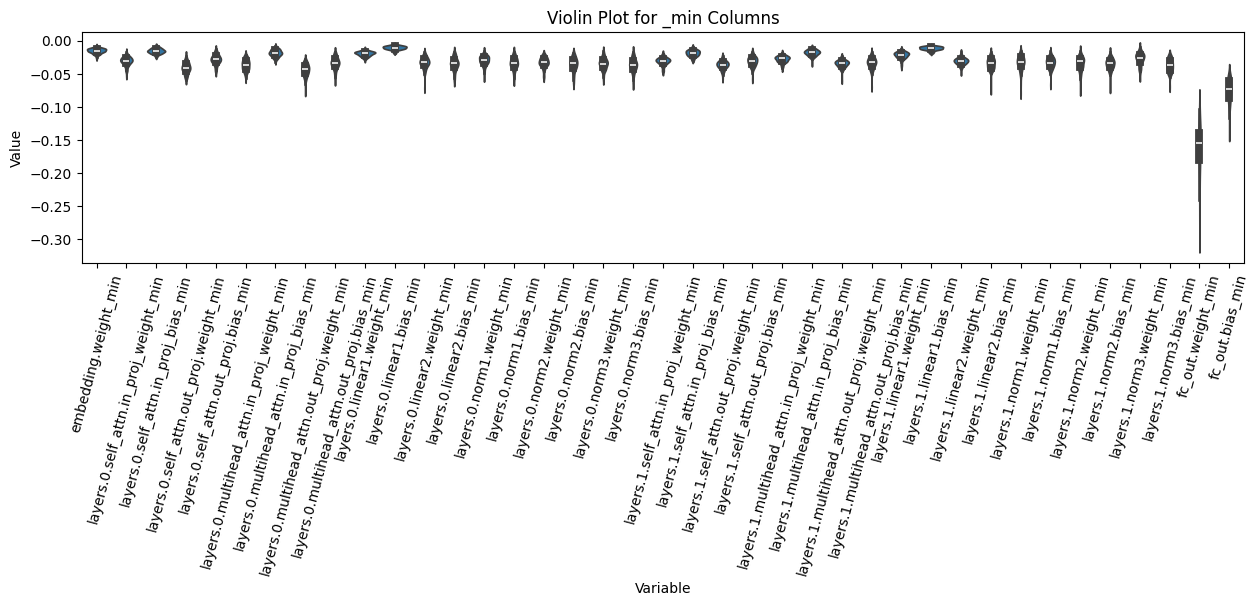

In [17]:
visualize_min(adam_df)

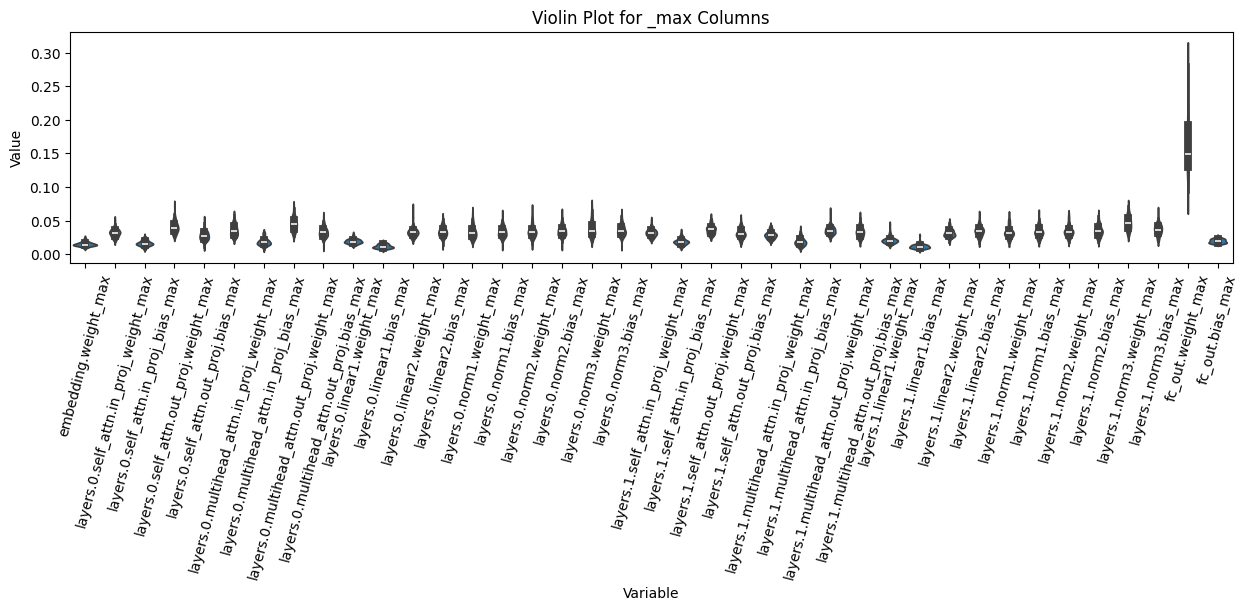

In [18]:
visualize_max(adam_df)

## SGD, Decay Coeff 1e-4

In [19]:
sgd_df1 = pd.read_csv('checkpoints_1/gradients.csv')

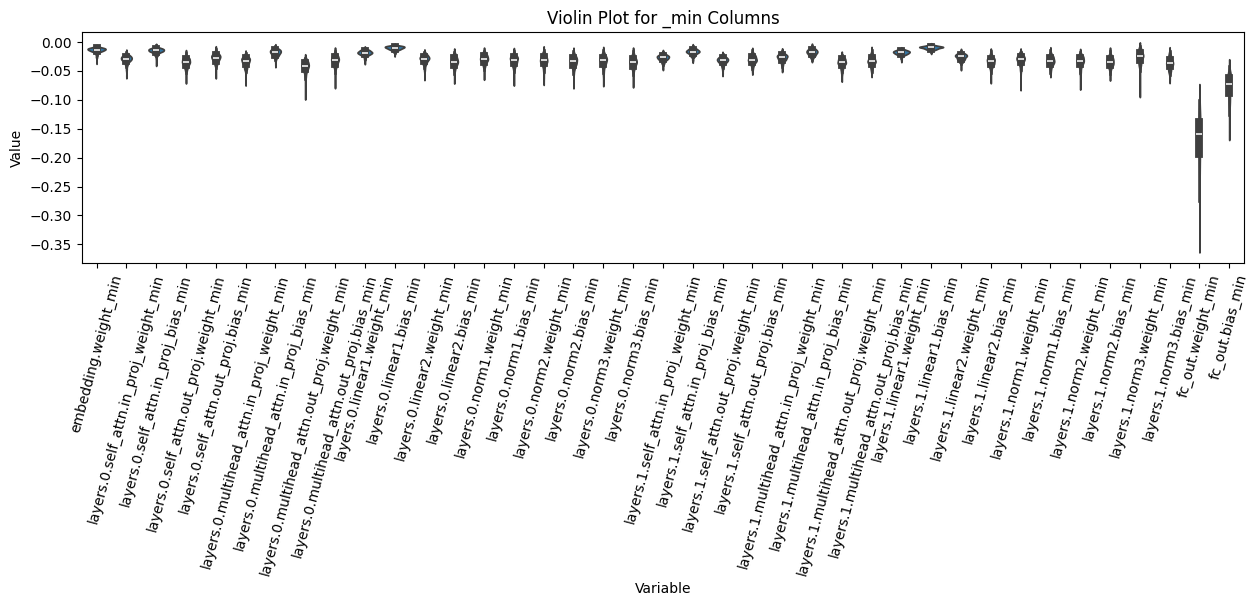

In [20]:
visualize_min(sgd_df1)

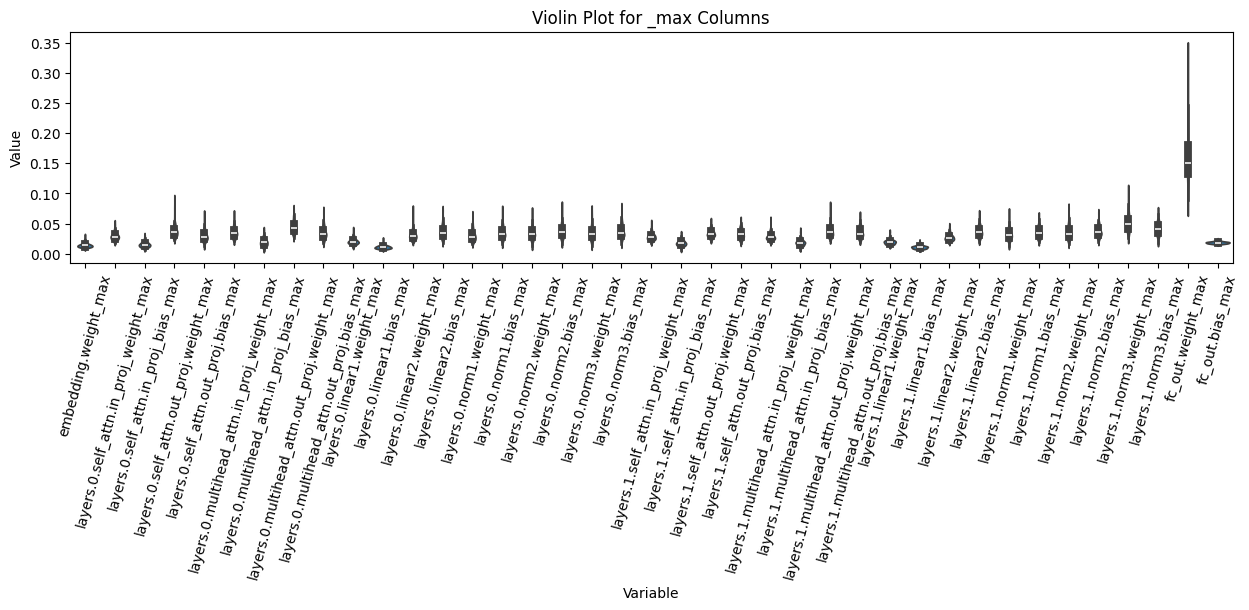

In [21]:
visualize_max(sgd_df1)

## SGD Coeff = 1e-3

In [22]:
sgd_df2 = pd.read_csv('checkpoints_2/gradients.csv')

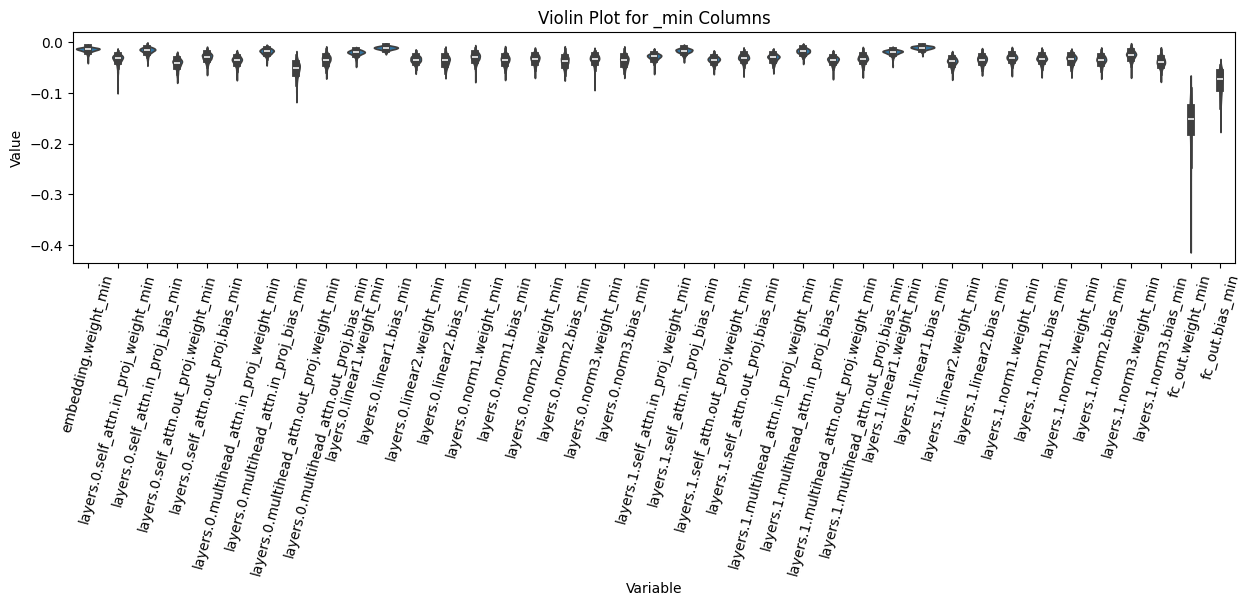

In [23]:
visualize_min(sgd_df2)

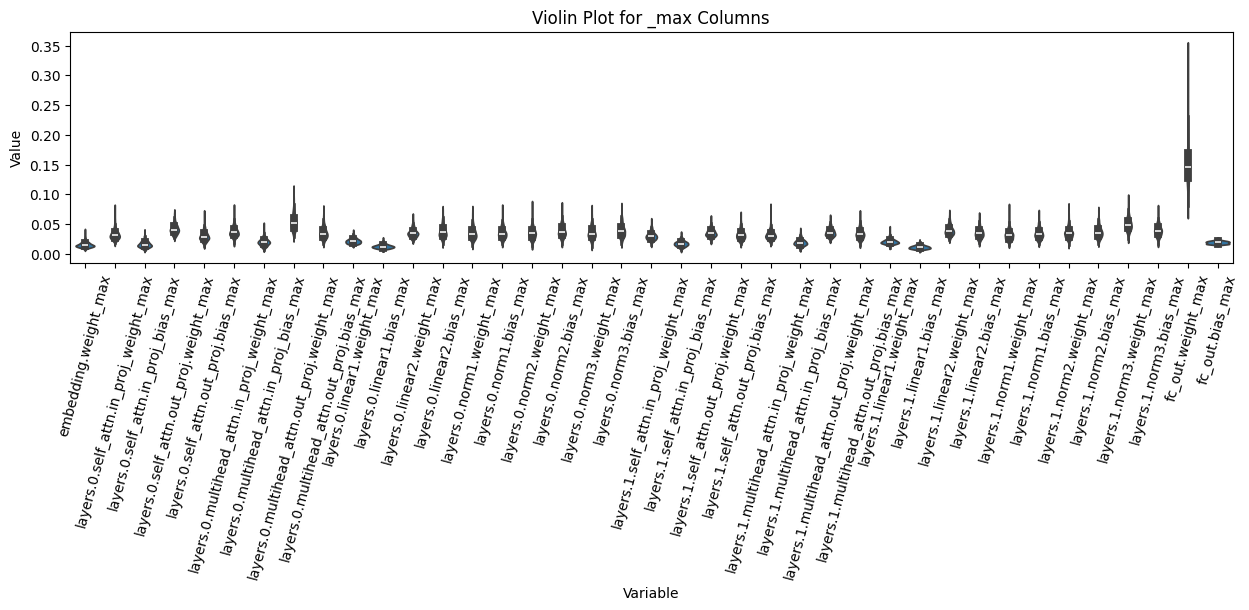

In [24]:
visualize_max(sgd_df2)

## Adam, activations

In [26]:
adam_acts = pd.read_csv("checkpoints_3/activations.csv")

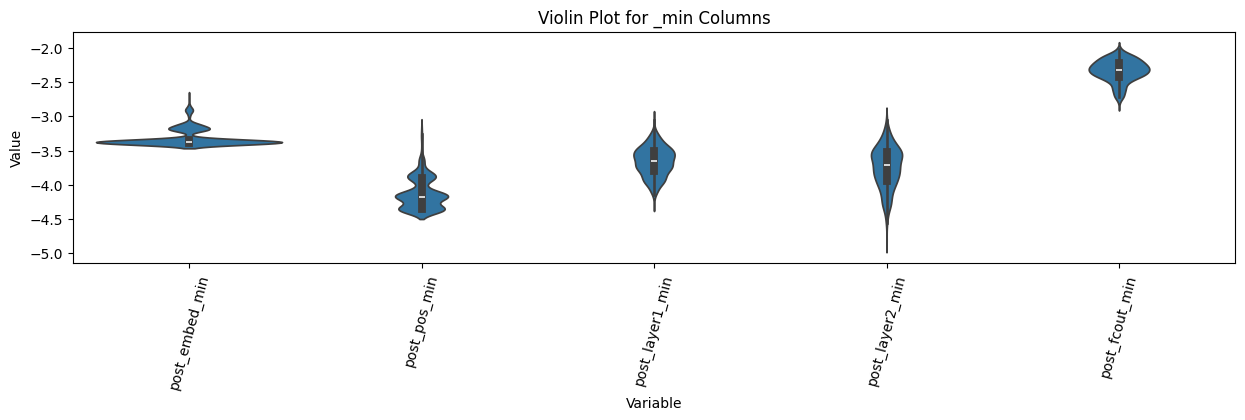

In [27]:
visualize_min(adam_acts)

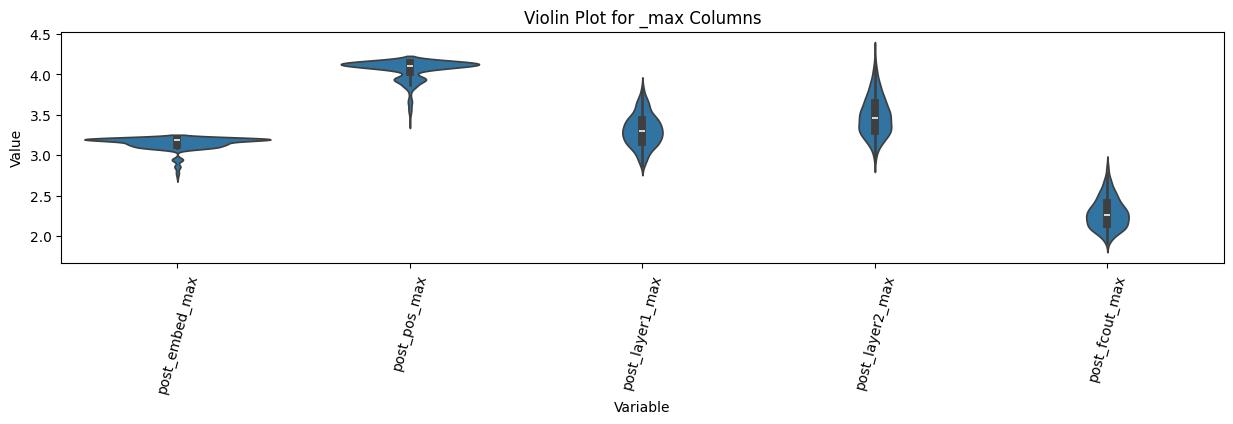

In [28]:
visualize_max(adam_acts)

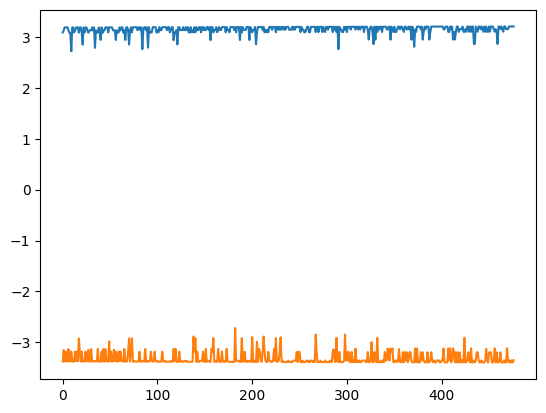

In [30]:
plt.plot(adam_acts['post_embed_max'])
plt.plot(adam_acts['post_embed_min'])

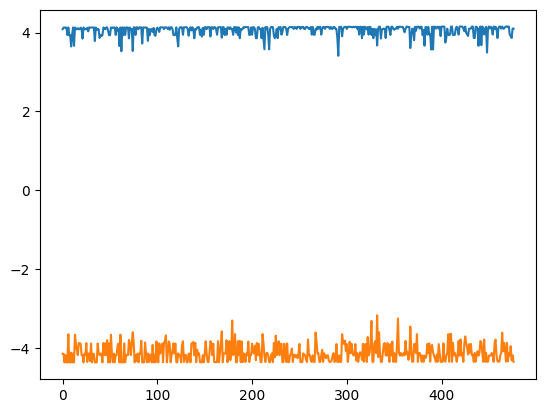

In [31]:
plt.plot(adam_acts['post_pos_max'])
plt.plot(adam_acts['post_pos_min'])

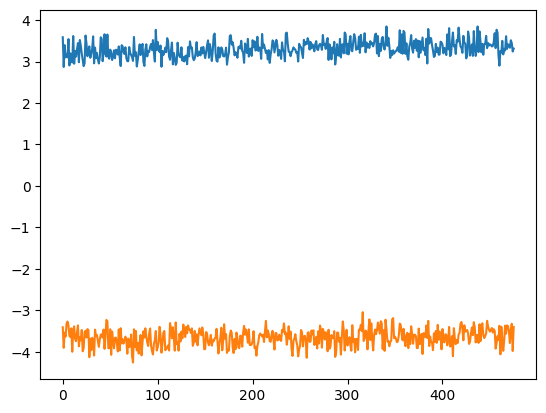

In [32]:
plt.plot(adam_acts['post_layer1_max'])
plt.plot(adam_acts['post_layer1_min'])

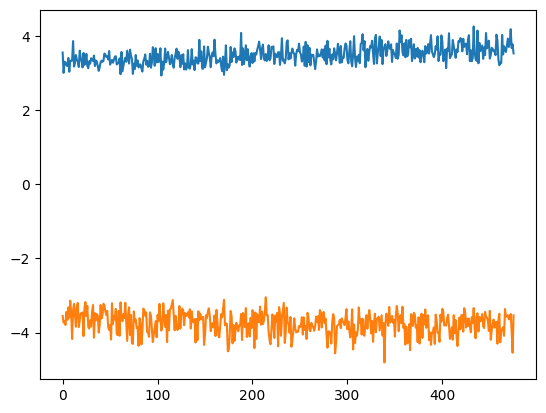

In [33]:
plt.plot(adam_acts['post_layer2_max'])
plt.plot(adam_acts['post_layer2_min'])

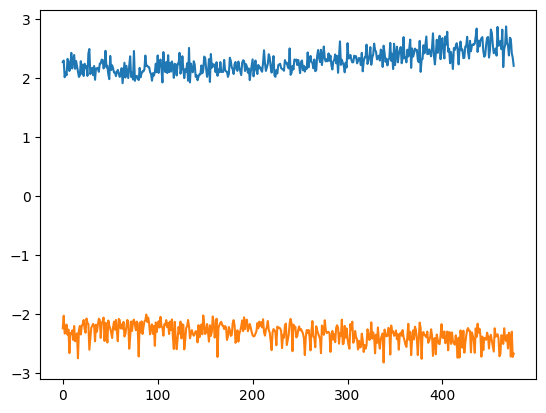

In [34]:
plt.plot(adam_acts['post_fcout_max'])
plt.plot(adam_acts['post_fcout_min'])

## Weights, Layer 1

In [37]:
from model import DecoderOnlyTransformer
import torch

In [40]:
model1 = DecoderOnlyTransformer(
        num_layers=2,
        model_dim=32,
        num_heads=2,
        hidden_dim=64,
        quantized_classes=103,
        padding_idx=102,
        verbose_acts=True
    )

model2 = DecoderOnlyTransformer(
        num_layers=2,
        model_dim=32,
        num_heads=2,
        hidden_dim=64,
        quantized_classes=103,
        padding_idx=102,
        verbose_acts=True
    )

In [39]:
state_dict1 = torch.load("checkpoints_3/model_300.pt")
state_dict2 = torch.load("checkpoints_3/model_400.pt")

In [41]:
model1.load_state_dict(state_dict1)
model2.load_state_dict(state_dict2)

<All keys matched successfully>

In [44]:
model1_params = {}
for name, params in model1.named_parameters():
    model1_params[name + "_min"] = params.min().item()
    model1_params[name + "_max"] = params.max().item()


In [45]:
model1_params

{'embedding.weight_min': -3.388413190841675,
 'embedding.weight_max': 3.1996538639068604,
 'layers.0.self_attn.in_proj_weight_min': -0.22966791689395905,
 'layers.0.self_attn.in_proj_weight_max': 0.23256729543209076,
 'layers.0.self_attn.in_proj_bias_min': -0.018720388412475586,
 'layers.0.self_attn.in_proj_bias_max': 0.012770827859640121,
 'layers.0.self_attn.out_proj.weight_min': -0.1901925504207611,
 'layers.0.self_attn.out_proj.weight_max': 0.18439702689647675,
 'layers.0.self_attn.out_proj.bias_min': -0.008135630749166012,
 'layers.0.self_attn.out_proj.bias_max': 0.007045949809253216,
 'layers.0.multihead_attn.in_proj_weight_min': -0.2263735979795456,
 'layers.0.multihead_attn.in_proj_weight_max': 0.2319505363702774,
 'layers.0.multihead_attn.in_proj_bias_min': -0.01627998985350132,
 'layers.0.multihead_attn.in_proj_bias_max': 0.014511684887111187,
 'layers.0.multihead_attn.out_proj.weight_min': -0.19336552917957306,
 'layers.0.multihead_attn.out_proj.weight_max': 0.18858970701694

In [46]:
model2_params = {}
for name, params in model2.named_parameters():
    model2_params[name + "_min"] = params.min().item()
    model2_params[name + "_max"] = params.max().item()

In [47]:
model2_params

{'embedding.weight_min': -3.393026828765869,
 'embedding.weight_max': 3.2038843631744385,
 'layers.0.self_attn.in_proj_weight_min': -0.2369723618030548,
 'layers.0.self_attn.in_proj_weight_max': 0.23813703656196594,
 'layers.0.self_attn.in_proj_bias_min': -0.022243086248636246,
 'layers.0.self_attn.in_proj_bias_max': 0.01525389775633812,
 'layers.0.self_attn.out_proj.weight_min': -0.19408762454986572,
 'layers.0.self_attn.out_proj.weight_max': 0.18734389543533325,
 'layers.0.self_attn.out_proj.bias_min': -0.009142649360001087,
 'layers.0.self_attn.out_proj.bias_max': 0.008665432222187519,
 'layers.0.multihead_attn.in_proj_weight_min': -0.23237887024879456,
 'layers.0.multihead_attn.in_proj_weight_max': 0.23937758803367615,
 'layers.0.multihead_attn.in_proj_bias_min': -0.02104044519364834,
 'layers.0.multihead_attn.in_proj_bias_max': 0.019248608499765396,
 'layers.0.multihead_attn.out_proj.weight_min': -0.19858135282993317,
 'layers.0.multihead_attn.out_proj.weight_max': 0.1933059692382